In [1]:
import torch
import torch.nn as nn
import numpy as np
import random

In [2]:
n_data = torch.ones(50, 2) # 数据的基本形态
x1 = torch.normal(2 * n_data, 1) # shape=(50, 2)
y1 = torch.zeros(50) # 类型0 shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1) # shape=(50, 2)
y2 = torch.ones(50) # 类型1 shape=(50, 1)

In [3]:
x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)
print(x.size())
print(y.size())

torch.Size([100, 2])
torch.Size([100])


In [4]:
device = torch.device("cuda")

In [5]:
import torch.utils.data as Data
batch_size = 10# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(x, y)

In [6]:
# 把 dataset 放入 DataLoader
data_iter = Data.DataLoader(
dataset=dataset, # torch TensorDataset format
batch_size=batch_size, # mini batch size
shuffle=True,# 是否打乱数据 (训练集一般需要进行打乱)
num_workers=1,)# 多线程来读数据，注意在Windows下需要设置为0

In [7]:
class LogisticNet(nn.Module):
    def __init__(self):
        super(LogisticNet,self).__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        y = self.sigmoid(self.linear(x))
        return y
net = LogisticNet()
net.to(device)

LogisticNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [8]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

LogisticNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [9]:
loss = nn.BCELoss()

In [10]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03)

In [12]:
loss_list = []
epoch_list = []
num_epochs = 20
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        X = X.to(device)
        y = y.to(device)
        l = loss(net(X), y.view(-1,1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    epoch_list.append(epoch)
    loss_list.append(l.item())
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.305142
epoch 2, loss: 0.191584
epoch 3, loss: 0.100841
epoch 4, loss: 0.079166
epoch 5, loss: 0.092252
epoch 6, loss: 0.130234
epoch 7, loss: 0.039398
epoch 8, loss: 0.097080
epoch 9, loss: 0.117219
epoch 10, loss: 0.079881
epoch 11, loss: 0.048597
epoch 12, loss: 0.044573
epoch 13, loss: 0.070670
epoch 14, loss: 0.021658
epoch 15, loss: 0.038614
epoch 16, loss: 0.047047
epoch 17, loss: 0.046526
epoch 18, loss: 0.042958
epoch 19, loss: 0.026014
epoch 20, loss: 0.038273


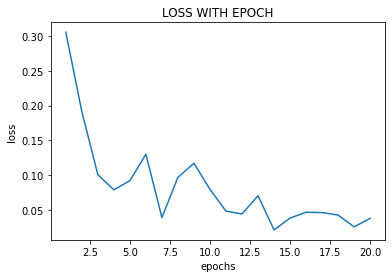

In [13]:
import matplotlib.pyplot as plt
plt.plot(epoch_list,loss_list)
plt.title("LOSS WITH EPOCH")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [14]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        X = X.to(device)
        y = y.to(device)
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [15]:
evaluate_accuracy(data_iter,net)

0.5